In [27]:
#The threshold limits for the eigenvalues should be varied from 0.9 to 0.97 in steps of 0.01. 
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn.model_selection import train_test_split

Matplotlib is building the font cache; this may take a moment.


In [29]:
data = pd.read_csv('PCA_practice_dataset.csv')
data.head()
data.shape

(8041, 35)

In [30]:
rng = RandomState()

train = data.sample(frac=0.7, random_state=rng)
test = data.loc[~data.index.isin(train.index)]

In [31]:
train.shape

(5629, 35)

In [32]:
test.shape

(2412, 35)

In [24]:
tr=train.T
cov = np.cov(tr)
print(cov)
print(tr.shape)
eig_val,eig_vec = np.linalg.eig(cov)

[[0.19765043 0.17704348 0.01212643 ... 0.16705667 0.16215428 0.00556893]
 [0.17704348 0.21413199 0.02896139 ... 0.15123261 0.19777761 0.02041912]
 [0.01212643 0.02896139 0.16987964 ... 0.00775427 0.02534979 0.11777805]
 ...
 [0.16705667 0.15123261 0.00775427 ... 0.19388485 0.18643252 0.00962109]
 [0.16215428 0.19777761 0.02534979 ... 0.18643252 0.24251091 0.02514593]
 [0.00556893 0.02041912 0.11777805 ... 0.00962109 0.02514593 0.12954829]]
(35, 5629)


In [33]:
cov.shape

(35, 35)

Number of components is 3
[3.5142712259035473, 1.9423166634853875, 0.24735875835227528]
Number of components is 3
[3.5142712259035473, 1.9423166634853875, 0.24735875835227528]
Number of components is 4
[3.5142712259035473, 1.9423166634853875, 0.24735875835227528, 0.13486931965994745]
Number of components is 4
[3.5142712259035473, 1.9423166634853875, 0.24735875835227528, 0.13486931965994745]
Number of components is 5
[3.5142712259035473, 1.9423166634853875, 0.24735875835227528, 0.13486931965994745, 0.09242312557562195]
Number of components is 5
[3.5142712259035473, 1.9423166634853875, 0.24735875835227528, 0.13486931965994745, 0.09242312557562195]
Number of components is 6
[3.5142712259035473, 1.9423166634853875, 0.24735875835227528, 0.13486931965994745, 0.09242312557562195, 0.08042253103233223]
Number of components is 7
[3.5142712259035473, 1.9423166634853875, 0.24735875835227528, 0.13486931965994745, 0.09242312557562195, 0.08042253103233223, 0.057610268406281855]


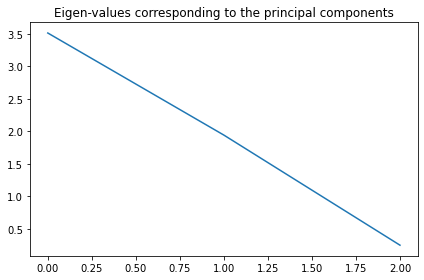

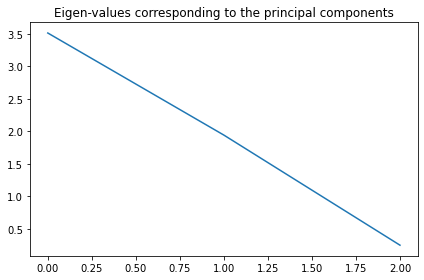

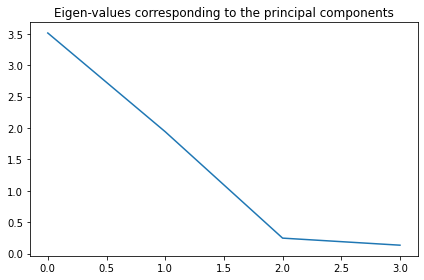

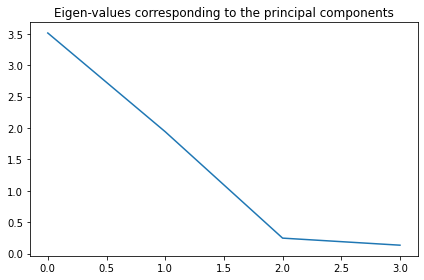

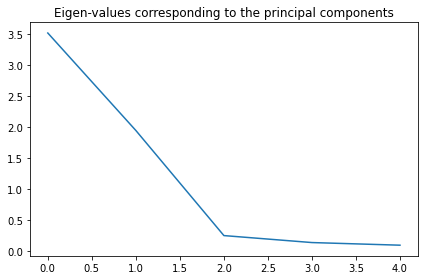

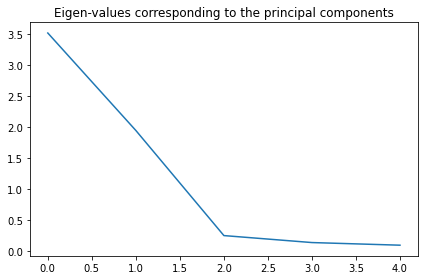

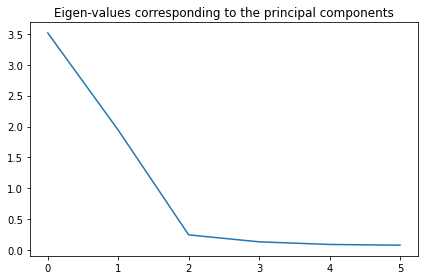

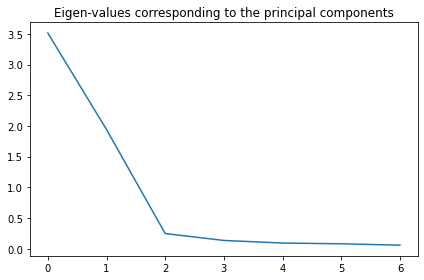

In [34]:
sort_idx = np.argsort(eig_val) 
sort_idx = sort_idx[::-1]

eig_val_sum = np.sum(eig_val)
temp_sum = 0
principal_eig_vec = []

principal_eig_val = []
j=0
for i in range(0,8):
    while(temp_sum<(0.9+0.01*i)*eig_val_sum):
        principal_eig_vec.append(eig_vec[sort_idx[j]])
        principal_eig_val.append(eig_val[sort_idx[j]])
        temp_sum += eig_val[sort_idx[j]]
        j += 1
    print("Number of components is {}".format(j))
    print(principal_eig_val)
    fig, ax = plt.subplots()
    ax.plot(principal_eig_val)
    ax.set_title("Eigen-values corresponding to the principal components")
    plt.tight_layout()